### Local Outlier Factor Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

In [3]:
X

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

In [4]:
from sklearn.neighbors import LocalOutlierFactor
# Fit LOF
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit(X)
scores = lof.negative_outlier_factor_

# Normalize the scores for color mapping
norm_scores = (scores - scores.min()) / (scores.max() - scores.min())

In [5]:
norm_scores

array([0.96758256, 0.96001636, 0.92678123, 0.95250879, 0.75332841,
       0.97147049, 0.98640476, 0.97073942, 0.98872985, 0.93284061,
       0.79601768, 0.97513472, 0.88964482, 0.93478033, 0.97007007,
       0.98169981, 0.92302747, 0.74334547, 0.97192756, 0.78809276,
       0.87574668, 0.99370546, 0.96136885, 0.98428649, 0.9850959 ,
       0.90127397, 0.95734341, 0.66932036, 0.96425276, 0.94529208,
       0.95059694, 0.95596118, 0.96960946, 0.94888346, 0.88704233,
       0.92291799, 0.97080306, 0.9744493 , 0.9858306 , 0.78048353,
       0.89290698, 0.98015302, 0.97947316, 0.94228349, 0.95135819,
       0.90737815, 0.989134  , 0.97693525, 0.9804665 , 0.77688063,
       0.97266282, 0.9147054 , 0.98576335, 0.8600961 , 0.91308752,
       0.        , 0.97910027, 0.92469878, 0.96948088, 0.94563795,
       0.94840289, 0.53252072, 0.96762065, 0.52195354, 0.95802254,
       0.96823131, 0.96989542, 0.94254102, 0.90993809, 0.95691263,
       0.94861571, 0.73829796, 0.9649127 , 0.9707192 , 0.93202

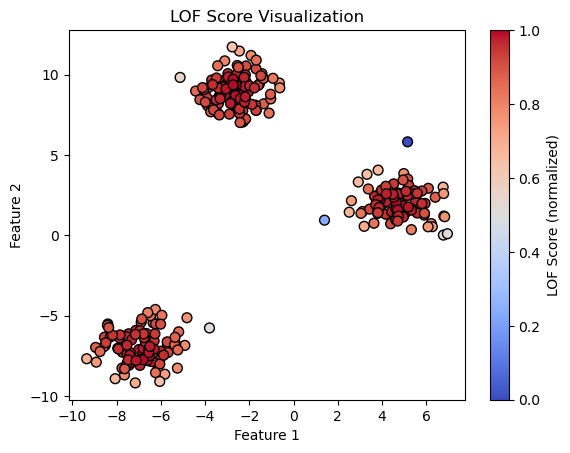

In [6]:
# Scatter plot with color-coded LOF scores
plt.scatter(X[:, 0], X[:, 1], c=norm_scores, cmap='coolwarm', edgecolor='k', s=50)
plt.colorbar(label='LOF Score (normalized)')
plt.title('LOF Score Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
# Predictions: -1 for outliers, 1 for inliers
predictions = lof.fit_predict(X)

In [8]:
# Separate inliers and outliers
inliers = X[predictions == 1]
outliers = X[predictions == -1]

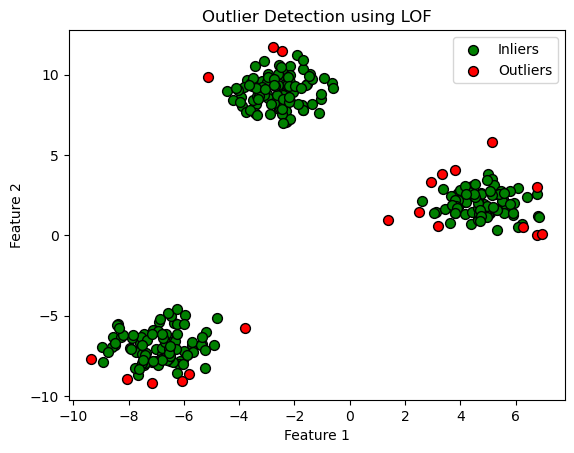

In [9]:
# Plot
plt.scatter(inliers[:, 0], inliers[:, 1], c='green', label='Inliers', edgecolor='k', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers', edgecolor='k', s=50)
plt.legend()
plt.title('Outlier Detection using LOF')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Interpretation

Scatter Plot with Color-Coded Scores: Shows the relative magnitude of LOF scores. Darker regions usually indicate stronger outliers.

Outlier Detection Visualization: Clearly separates inliers and outliers for easy identification.